<h1> Importing Libraries and Exploring Data

In [29]:
import pandas as pd
import numpy as np
import warnings
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import sys

In [30]:
print(sys.executable)

/opt/anaconda3/bin/python


<h2> Input 

In [4]:
#Reading in the files
df = pd.read_json('/Users/pinakshome/Downloads/pii-detection/train.json')

<h3> Pre-EDA

In [5]:
df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [6]:
df.shape

(6807, 5)

In [7]:
df.dtypes

document                int64
full_text              object
tokens                 object
trailing_whitespace    object
labels                 object
dtype: object

In [31]:
(df['trailing_whitespace'][1][:5])

[True, False, False, True, True]

In [21]:
df['labels'][1][:5]

['B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O', 'O']

In [22]:
len(df['tokens'][1])

563

In [24]:
df['tokens'][1][:8]

['Diego',
 'Estrada',
 '\n\n',
 'Design',
 'Thinking',
 'Assignment',
 '\n\n',
 'Visualization']

In [32]:
len(df['full_text'])

6807

In [33]:
len(df['full_text'][1])

2915

<H3> EDA on full_text feature

<h3> Text Analysis

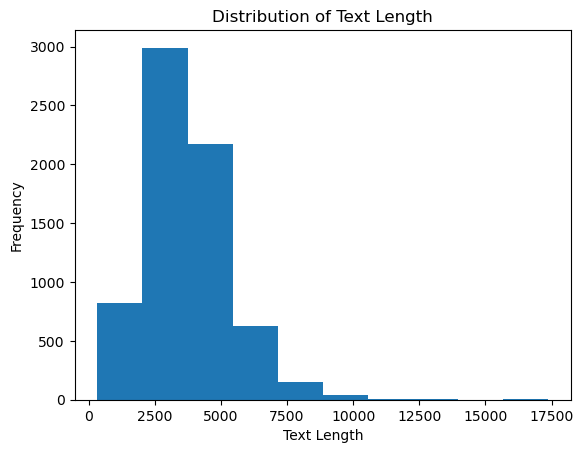

In [34]:
df['text_length'] = df['full_text'].apply(len)
plt.hist(df['text_length'], bins=10)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

#Checking the distribution of text length

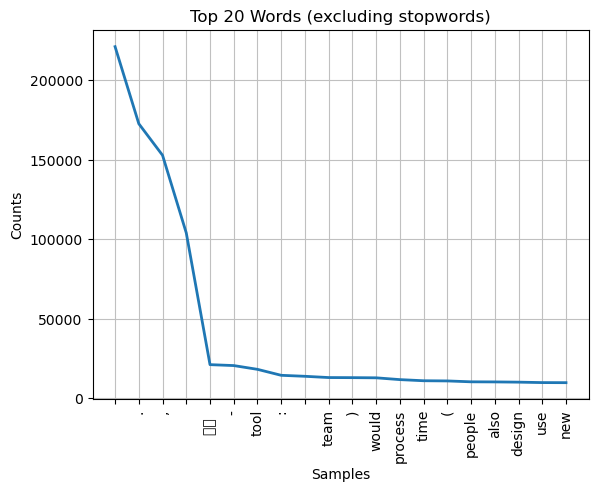

<Axes: title={'center': 'Top 20 Words (excluding stopwords)'}, xlabel='Samples', ylabel='Counts'>

In [35]:
###Checking the top 20 words across all documents not considering stop words

stop_words = set(stopwords.words('english'))
all_words = [word for tokens in df['tokens'] for word in tokens if word.lower() not in stop_words]
word_freq = nltk.FreqDist(all_words)
word_freq.plot(20, title="Top 20 Words (excluding stopwords)")

<h3> Tokens

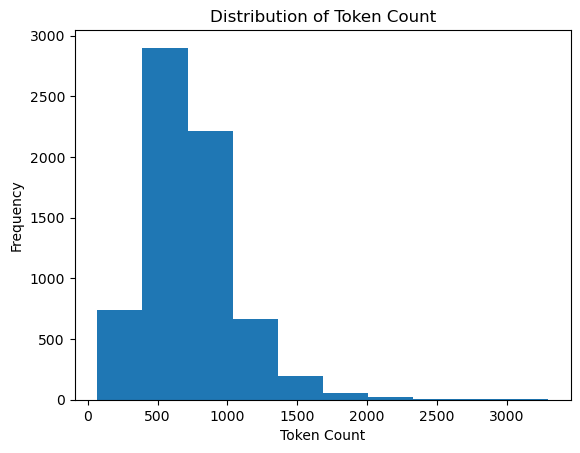

In [36]:
df['token_count'] = df['tokens'].apply(len)
plt.hist(df['token_count'], bins=10)
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.title('Distribution of Token Count')
plt.show()

In [37]:
unique_tokens = set(all_words)
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 53642


In [40]:
### Identifying if tokens are already standardized 

from collections import defaultdict


all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Creating a dictionary to hold each unique token and its variations
token_variations = defaultdict(set)

# Populating the dictionary
for token in all_tokens:
    # Using a standardized form for matching 
    standardized_token = token.lower()
    token_variations[standardized_token].add(token)

# Identifying tokens with variations
count=0
for standard_token, variations in token_variations.items():
    count+=1
    if len(variations) > 1 and count<50:
        print(f"Token: {standard_token}, Variations: {variations}")
        
        
        
        
####### The tokens are not completely inconsistency free

## We will check further to see if we have punctuational token variations

Token: design, Variations: {'DESIGN', 'design', 'Design'}
Token: thinking, Variations: {'Thinking', 'THINKING', 'thinking'}
Token: for, Variations: {'for', 'FOR', 'For'}
Token: innovation, Variations: {'INNOVATION', 'innovation', 'Innovation'}
Token: reflexion, Variations: {'reflexion', 'Reflexion'}
Token: challenge, Variations: {'challenge', 'CHALLENGE', 'Challenge'}
Token: selection, Variations: {'Selection', 'selection', 'SELECTION'}
Token: the, Variations: {'The', 'THE', 'the'}
Token: tool, Variations: {'TOOL', 'Tool', 'tool', 'TooL'}
Token: i, Variations: {'I', 'i'}
Token: use, Variations: {'USE', 'use', 'Use'}
Token: to, Variations: {'TO', 'To', 'to'}
Token: help, Variations: {'help', 'Help', 'HELP'}
Token: all, Variations: {'all', 'ALL', 'All'}
Token: stakeholders, Variations: {'STAKEHOLDERS', 'stakeholders', 'Stakeholders'}
Token: finding, Variations: {'finding', 'Finding'}
Token: their, Variations: {'Their', 'THEIR', 'their'}
Token: way, Variations: {'Way', 'WAY', 'way'}
Token

In [41]:
import string
from collections import defaultdict


all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Function to remove punctuation from a token
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Dictionary to keep track of tokens with and without punctuation
tokens_with_without_punct = defaultdict(lambda: {'with': set(), 'without': set()})

for token in all_tokens:
    stripped_token = remove_punctuation(token)
    if stripped_token != token:
        # The token had punctuation and was modified
        tokens_with_without_punct[stripped_token]['with'].add(token)
    else:
        # The token had no punctuation to remove
        tokens_with_without_punct[stripped_token]['without'].add(token)

# Now, we'll find tokens that exist both with and without punctuation
tokens_with_both_forms = {token: forms for token, forms in tokens_with_without_punct.items() if forms['with'] and forms['without']}

# Display results
for token, forms in tokens_with_both_forms.items():
    print(f"Base Token: {token}, With Punctuation: {forms['with']}, Without Punctuation: {forms['without']}")


Base Token: Design, With Punctuation: {'Design--'}, Without Punctuation: {'Design'}
Base Token: Thinking, With Punctuation: {'Thinking-'}, Without Punctuation: {'Thinking'}
Base Token: for, With Punctuation: {'.for', 'for/', '-for'}, Without Punctuation: {'for'}
Base Token: innovation, With Punctuation: {'innovation-', '-innovation'}, Without Punctuation: {'innovation'}
Base Token: Challenge, With Punctuation: {'Challenge-', 'Challenge:-', '-Challenge-', 'Challenge/'}, Without Punctuation: {'Challenge'}
Base Token: selection, With Punctuation: {'selection-'}, Without Punctuation: {'selection'}
Base Token: The, With Punctuation: {'-The', 'The-', '.The'}, Without Punctuation: {'The'}
Base Token: tool, With Punctuation: {'-tool', 'tool-'}, Without Punctuation: {'tool'}
Base Token: I, With Punctuation: {'I.', '-I', '.I'}, Without Punctuation: {'I'}
Base Token: use, With Punctuation: {'use-', 'use/'}, Without Punctuation: {'use'}
Base Token: to, With Punctuation: {'to-'}, Without Punctuatio

### Based on the cell results above it seems like there exists token with punctuation versions

- Considering standardizing the tokens after a more basic EDA of the rest of the features

<h3> Label Distribution

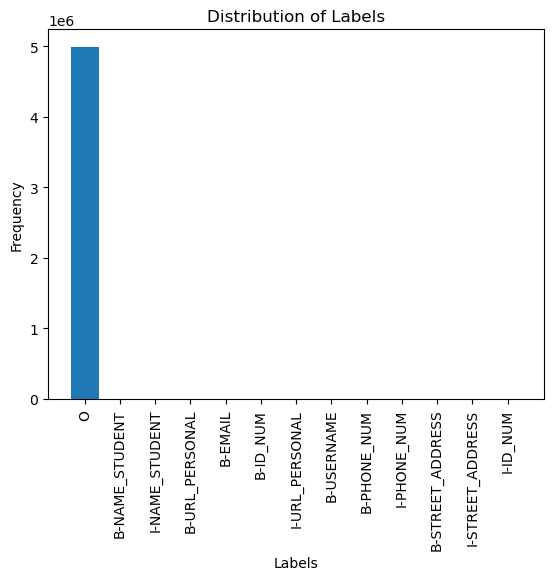

In [44]:
all_labels = [label for sublist in df['labels'] for label in sublist]
label_freq = nltk.FreqDist(all_labels)
plt.xticks(rotation=90)
plt.bar(label_freq.keys(), label_freq.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

In [50]:
all_labels = [label for sublist in df['labels'] for label in sublist if label != "O"]

#  Count the frequencies of the worded labels
label_frequencies = Counter(all_labels)

#  Print the frequency of each label
for label, count in label_frequencies.items():
    print(f"{label}: {count}")

B-NAME_STUDENT: 1365
I-NAME_STUDENT: 1096
B-URL_PERSONAL: 110
B-EMAIL: 39
B-ID_NUM: 78
I-URL_PERSONAL: 1
B-USERNAME: 6
B-PHONE_NUM: 6
I-PHONE_NUM: 15
B-STREET_ADDRESS: 2
I-STREET_ADDRESS: 20
I-ID_NUM: 1


In [51]:
### Checking out some rows with these labels present 
labels_of_interest = ["B-EMAIL", "B-ID_NUM"]

for label in labels_of_interest:
    # Use a boolean mask to filter rows where our label of interest is found
    mask = df['labels'].apply(lambda x: label in x)
    
    # Display the filtered rows for this label
    display(df[mask].head())  # Using .head() to display a few rows, adjust as needed


,document,full_text,tokens,trailing_whitespace,labels,text_length,token_count
24,379,"COURSERA – University of Virginia, Darden Scho...","[COURSERA, –, University, of, Virginia, ,, Dar...","[True, True, True, True, False, True, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",4244,766
86,2769,Design Thinking for Innovation\n\nby Universit...,"[Design, Thinking, for, Innovation, \n\n, by, ...","[True, True, True, False, False, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",3084,623
134,3709,", Vol.7, No.5, May 2009\n\nE-ISSN: 2321-9637\n...","[,, Vol.7, ,, No.5, ,, May, 2009, \n\n, E, -, ...","[True, False, True, False, True, True, False, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",12098,2456
171,4227,Mohamed Smith (agood@gmail.com)\n\nVisualizati...,"[Mohamed, Smith, (, agood@gmail.com, ), \n\n, ...","[True, True, False, False, False, False, False...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-EMAIL, O...",4118,803
185,4381,"WRITING CENTRE Level 3 East, Hub Central Nor...","[WRITING, CENTRE, , Level, 3, East, ,, Hub, C...","[True, True, False, True, True, False, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",6147,1222


,document,full_text,tokens,trailing_whitespace,labels,text_length,token_count
29,609,Date:14-09-2021\n\nNEWS PAPER\n\nProject: News...,"[Date:14, -, 09, -, 2021, \n\n, NEWS, PAPER, \...","[False, False, False, False, False, False, Tru...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",4195,915
99,2926,NAME: Ignacia Hernandez Roll No. : 932353568...,"[NAME, :, Ignacia, Hernandez, , Roll, No, .,...","[False, True, True, True, False, True, False, ...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O...",1774,429
124,3565,Project: Experiment sheet (5W+H)\n\nInterview...,"[Project, :, , Experiment, sheet, (, 5W+H, ),...","[False, True, False, True, True, False, False,...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",1756,428
213,4717,STORY TELLING\n\nPIN NO. :163133980712 NAME ...,"[STORY, TELLING, \n\n, PIN, NO, ., :, 16313398...","[True, False, False, True, False, True, False,...","[O, O, O, O, O, O, O, B-ID_NUM, O, O, O, B-NAM...",1946,443
231,4913,DESIGN THINKING\n\nEXPERIMENT – 2\n\nName: Niz...,"[DESIGN, THINKING, \n\n, EXPERIMENT, –, 2, \n\...","[True, False, False, True, True, False, False,...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",2471,605


In [52]:
!

zsh:1: command not found: path
